## 介绍

本部分简单介绍因果推断的基本概念和方法。包括两种因果推断的框架。



+ https://www.math.pku.edu.cn/xyxw/132266.htm (Simpson悖论)

+ Simpson悖论 1 
 

![covid](./figures/simpsoncovid.png)

+ Simpson悖论 2

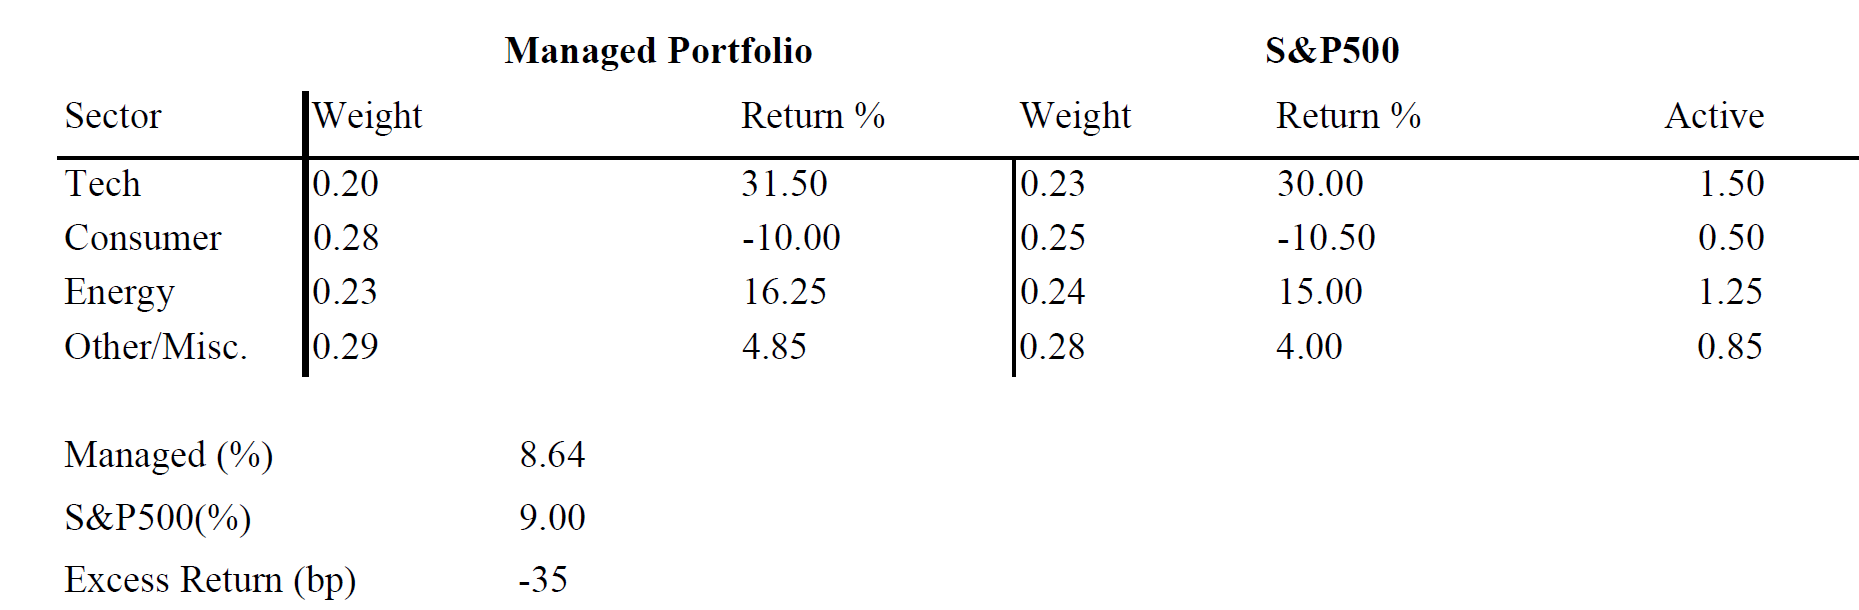

## 分析数据

![nobels.jpg](./figures/nobels.jpg)

![butterandsp.jpg](./figures/butterandsp.jpg)

![autism.png](./figures/autism.png)

## 为什么要因果推断

+ 机器学习算法常见的目标是进行预测，进行有监督的学习。
+ 其利用观察数据发现从输入\特征变量 $X$ 到 输出\响应变量 $Y$的映射进行预测。该映射揭示了输入和输出之间的潜在模式\结构。
+ 然而，学习算法通常是挖掘输入和输出之间的相关关系，其目的并不是发现$X$对$Y$的确定(因果，生成)机制，可能不能发现因果关系。比如
  - 公鸡叫和太阳升，
  - 啤酒和尿布销量
  - 冰激凌销量和溺水数量
+ 如果要进行决策干预，需要预测的是干预改变$X$为特定值后$Y$的可能值。



+ 如何理解干预后的可能值
   + 做实验，干预X，然后观测Y，
   + 没有实验， 对一个个体来说，通常没有重复观察，他的$X$ 取某值后就不可能取另一个值。比如评估药物的疗效，个体只能接受或者不接受治疗。也就是可能有一个虚拟事实存在，他在现实世界是观察不到的。即涉及到所谓“虚拟事实”

下面一些问题，在决策场景下，通常涉及估计虚拟事实
+ 决策是否有效？总效应是多少？
  - 一个政策是否能改变人们的收入
  - 进步奖学金是否能提高学生成绩
  - 系统推荐对购买的影响多少
+ 决策为什么有效？
  - 是什么导致收入的改变
  - 进步奖学金是如何提高学习成绩的
  
+ 我们应该做什么决策？
  - 有什么提高收入的方法
  
+ 决策会对什么量产生影响？
   
   - T+1 如果改为T+0 会对市场产生什么影响
  
+ 回答这些问题都需要因果推理。存在很多因果推断的方法，他们有不同的理论基础和假设。

+ 关于因果的谚语
　　　
    + 我宁愿发现一条因果律也不愿成为波斯国王。  --- 德谟克利特   
    + 我们直到把握了事物的原因，才能真正了解它。---  亚里士多德

+ 传统统计学

    + 相关性不等于因果关系    
    +　你不能用统计学证明因果关系

## 两种框架

+ potential outcome models (Neyman,Rubin), causal graphical models (Pearl)

 
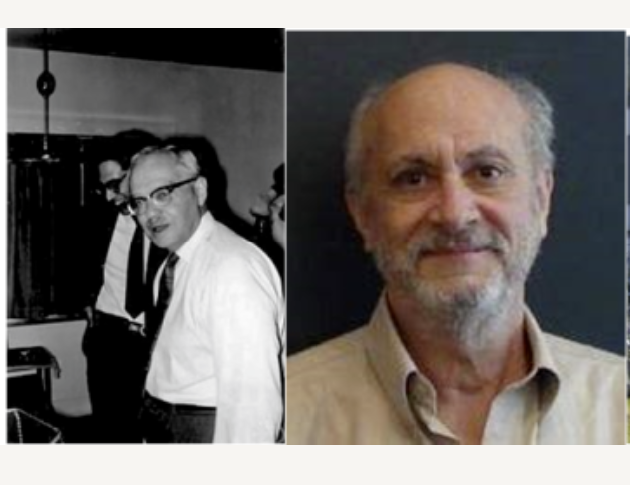
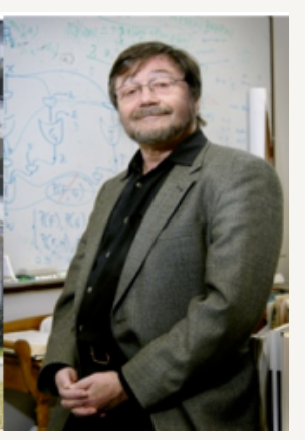

# 潜在结果（虚拟事实）模型

+ $i$表示个体，$Z$是处理变量，取值0，1，$Y$是响应结果变量。
+ 个体因果效应的数学定义
  + 对每个个体$i$, $Y$有两种结果：
  $$Y_i(0)\text{ and } Y_i(1),$$
  假定这是两个客观存在的量，只是我们通常不能同时观察他们。个体因果效应就是个体$i$接受处理和不接受处理的响应之差。
  $$\tau_i=Y_{i}(1)- Y_{i}(0).$$
     + 假设每个个体都有潜在量，如果恰好观察到$Z_i=0$，如何我们有$Y_{i}(0)=Y_i$(这个仍然是假设)。通常情况下，对单个个体，我们不能既观察到 $Y_{i}(0)$,又观察到 $Y_{i}(1)$.因此个体因果效应通常不可估计。
     

+ 平均因果效应(ATE)： 考虑关心总体的因果效应
    + 假设 $$X_i,Z_,Y_i(1),Y_i(0)\sim_{iid} \{X,Z,Y(1),Y(0)\},$$
       
    + 平均因果效应定义为：   $$\tau =E[Y{(1)}- Y{(0)}].$$
       
+ 条件因果效应(CATE)
  $$\tau_x =E[Y(1)|X=x]- E[Y(0)|X=x].$$
      
+ 潜在结果模型框架研究估计 $\tau$或 $\tau_x$ 的实验方法，可识别性条件，估计方法，假设检验等问题。
  

#### 困难在哪里？
 
+ 很多情况下，个体因果效应是不可识别的， 而平均因果效应 $E[Y(1)-Y(0)]$可能能识别

+ 我们先理解：

Z| 潜在 Y(0) | 潜在Y(1)   | 可以计算的条件期望
-----|-----      |-----|------
0    |看到 $Y(0)$ | 没看到 Y(1) | $(Y\mid Z=0)$
1    |没看到 Y(0) |看到 $Y(1)$ | $E(Y\mid Z=1)$



+ 如果Z=1和Z=0的群体特质不一样，即有可能：
$$E(Y(0))\neq E(Y|Z=0),E(Y(1))\neq E(Y|Z=1)$$
注意：$$E(Y(0))=E(Y(0)|Z=0)P(Z=0)+E[Y(0)|Z=1]P(Z=1)=E(Y|Z=0)P(Z=0)+E[Y(0)|Z=1][1-P(Z=0)].$$
如果要$E(Y(0))= E(Y|Z=0)$,必须满足 $$E(Y|Z=0)=E[Y(0)|Z=1]，$$即看到的和没有看到的期望要一样。

+ 因此，处理Z分配的（赋值的）机制非常关键。

####  为什么随机实验数据可以识别平均因果效应 

+ 随机化是评估因果效应的经典的金标准！

+ 完全随机实验，从总体中随机选一部分接受处理$Z=1$，另一部分接受处理$Z=0$。因为 $Z \perp\kern-5pt\perp \{Y(0),Y(1)\}$  ,有  

$$E[Y(1)]=E[Y(1)|Z=1)=E(Y|Z=1);$$
$$E[Y(0)]=E[Y(0)|Z=0)=E(Y|Z=0).$$
+  $T\perp\kern-5pt\perp \{Y_A,T_B\}$ 叫 **可忽略性(ignorability)**，其是因果效应可以识别的关键。有了这个关键假设（还有其他暗含假设），看不见的就可以通过看见的估计了。

+ 可忽略性不成立，也是大多数观测数据不能估计(识别)因果效应的原因。
+  在回归模型$y=a+bx+e$中，这个类似于要求 $cov(x,e)=0$.

+ 这个假设之所以被称为"ignorability"，是因为它允许研究人员在进行因果估计时“忽略”处理赋值机制。换句话说，如果满足可忽略性假设，那么处理赋值的方式（如随机或非随机）不会影响因果效应的估计。  

#### 观察数据识别因果

 
+ 对非完全随机实验或者观测数据，在假设  $Z \perp\kern-5pt\perp \{Y(0),Y(1)\}|X$ 下， 估计因果效应$E[Y(1)-Y(0)]$,
$$E(Y(1)|X)=E(Y|Z=1,X)$$
$$E(Y(0)|X)=E(Y|Z=0,X)$$ 

也就是说：通过固定分配机制之后，就保证了独立性
+  平均因果效应： 
\begin{align*}
\tau=E(Y(1) - Y(0)) 
&= \sum_{X} E(Y(1)|X) P(X) - \sum_{X} E(Y(0)| X) P(X) \\
&= \sum_{X} E(Y(1) | Z = 1, X) P(X) - \sum_{X} E(Y(0) | Z = 0, X) P(X) \\
&= \sum_{X} E(Y| Z = 1, X) P(X) - \sum_{X}E(Y  | Z = 0, X) P(X)
\end{align*}
+ 这个叫 g-formula 

##### 分配机制

+ 分配机制非常重要，其由倾向得分(propensity score)定义$$e(X)=pr(Z=1|X).$$
+ Rosenbaum and Rubin (1983): The central role of the propensity score in observational studies for causal effects:

+ **Theorem 1**:  
 
 $$\text{ If } Z \perp\kern-5pt\perp \{Y(0),Y(1)\}|X,\text{then } Z \perp\kern-5pt\perp \{Y(0),Y(1)\}|e(X)$$
 
+ 倾向得分是概率，可以按其分层，然后用g-formula计算因果效应，Rosenbaum等推荐 K=5  

####  Inverse propensity score weighting(IPW)
+ **Theorem 2**：
 $\text{ If } Z \perp\kern-5pt\perp \{Y(0),Y(1)\}|X,\text{and } 0 <e(X)<1$，then
 $$E\{Y(1)\}=E\left\{ ZY\over e(X)  \right\},\quad E\{Y(0)\}=E\left\{ (1-Z)Y\over 1-e(X)  \right\},$$
 and
 $$\tau = E\{Y(1) - Y(0)\} = E\left\{ \frac{ZY}{e(X)} - \frac{(1-Z)Y}{1-e(X)} \right\}
$$
证明：image from ding peng's book
![IPWproof.png](./figures/IPWproof.png)

####  Inverse propensity score weighting(IPW)

+ 由 $$\tau = E\{Y(1) - Y(0)\} = E\left\{ \frac{ZY}{e(X)} - \frac{(1-Z)Y}{1-e(X)} \right\}$$
+ 可给出估计IPW estimator：
  $$\hat{\tau}=  \frac{1}{n}\sum_{i=1}^n \frac{Z_iY_i}{\hat{e}(X)} -  \frac{1}{n}\sum_{i=1}^n\frac{(1-Z_i)Y_i}{1-\hat{e}(X)},$$
+ 缺点：
    - 对靠近0，和1的e(X)特别敏感
    - 对Y的平移缺乏不变性，即将$Y_i$变为$Y_i+c$，因果效应是差值，应该不变，但估计量改变了。

### 双稳健估计
$\tau = E\{Y(1) - Y(0)\}$
+ 响应的回归方法，
如果我们对$EY(1)$, $ EY(0)$分别进行回归，利用X估计它们。可以改写为
$$\tau = E\{\mu_1(X) - \mu_0(X)\},$$
 其中 $\mu_1(X)=E\{Y(1)|X\}=E\{Y|Z=1,X\},\mu_0(X)=E\{Y(0)|X\}=E\{Y|Z=0,X\}$
 - 对处理Z=1,和Z=0的群体的Y分别进行建模：$\mu_1(X,\beta_1)$和$\mu_0(X,\beta_0)$是两个群体的参数模型。
 $$\hat \tau_r =E\mu_1(X,\beta_1)-E\mu_0(X,\beta_0)$$
 如果模型正确，我们有：$\mu_1(X,\beta_1)=\mu_1(X)$和$\mu_0(X,\beta_0)=\mu_0(X)$,因果效应的估计就是对的。
+ 倾向得分方法，倾向得分也需要估计$\hat{e}(X)$, 进而得到IPW估计 $$\hat{\tau}=  \frac{1}{n}\sum_{i=1}^n \frac{Z_iY_i}{\hat{e}(X)} -  \frac{1}{n}\sum_{i=1}^n\frac{(1-Z_i)Y_i}{1-\hat{e}(X)},$$

+ 不能保证那种方法得到的估计是正确的。如何组合，形成双稳健估计，确保只要有一种方法是正确的，估计就是对的。

### 双稳健估计

$$\tilde{\mu}_1^{dr}=E\left[\frac{Z\{Y-\mu_1(X,\beta_1)\}}{e(X,\alpha)}+\mu_1(X,\beta_1)\right]$$

$$\tilde{\mu}_0^{dr}=E\left[\frac{Z\{Y-\mu_0(X,\beta_0)\}}{e(X,\alpha)}+\mu_0(X,\beta_0)\right]$$

结论： 如果 $e(X,\alpha)=e(X)$ 或者 $\mu_1(X,\beta_1)=\mu_1(X),\mu_0(X,\beta_0)=\mu_0(X)$, 那么，$\tilde{\mu}_1^{dr}=E(Y(1)),\tilde{\mu}_0^{dr}=E(Y(0))$,$\tau$的估计也是对的。

### 工具变量方法

### 因果图模型(Pearl)

#### 干预定义因果

 
+ 实验，干预 do 运算
+ 因果关系，$P(Y|do(T=A))\neq P(Y|do(T=B))$  
+  通常 $P(Y|do(T=A)\neq P(Y|T=A)$
+ Intervention  and causation

   C causes E if and only if  it is possible to intervene to  change  the value of C, in such a way that if that  intervention were to occur, the  value of E or the probability distribution of  E   would change. 

  

###  概率图模型 （贝叶斯网络）

 Bayesian 网络是最常见的概率图模型，其由两部分构成，一部分是DAG，一部分是条件概率表
 
 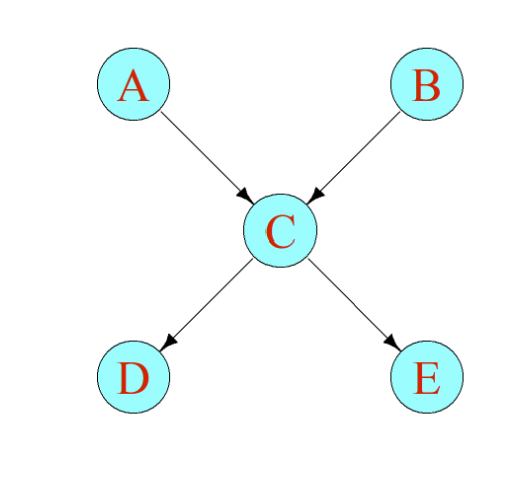
 
 通常利用链式法则求联合分布:

$$P(A,B,C,D,E) = P(A|B,C,D,E) P(B|C,D,E) P(C|D,E) P(D|E) P(E)$$

如果模型可以用如上的Bayesian network 表示，则联合分布可以表示为:

$$P(A,B,C,D,E) = P(A) P(B) P(C|A,B) P(D|C) P(E|C)$$
可以比较一下参数数量，联合分布一共有  ($2^5-1=31$ 个参数，但贝叶斯网络只需要 10个参数。


####  因果图模型

+ DAG表示的因果结构 +  直接原因到结果的因果机制（模型：函数或者条件概率表）

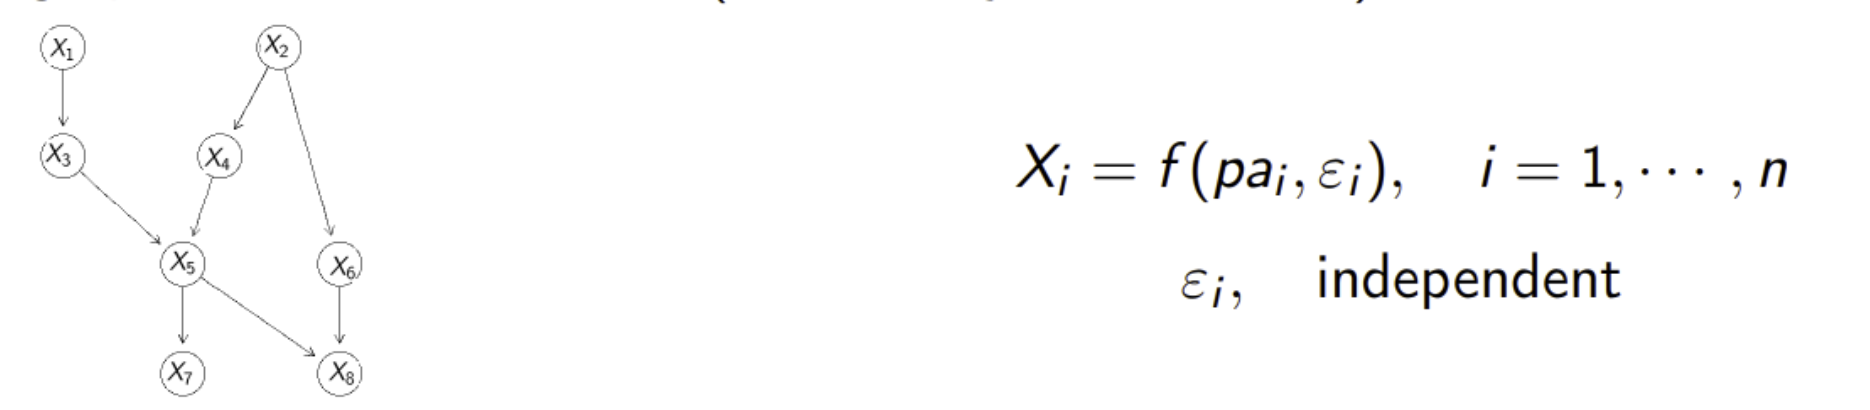

+ do运算

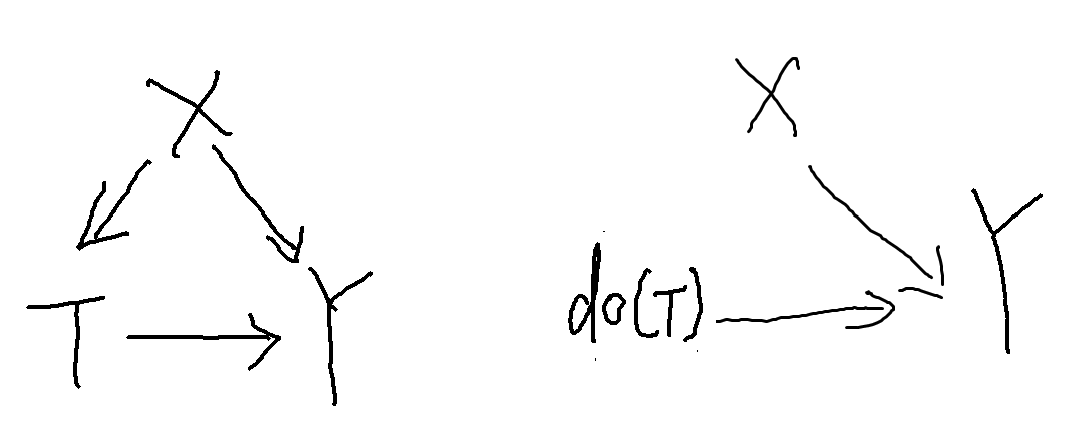

## Markov性与因果关系


+ 三种基本结构
+ D 分离

In [71]:
#  pgmpy包

from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete.CPD import TabularCPD
student = BayesianNetwork([('diff', 'grades'), ('intel', 'grades')])
diff_cpd = TabularCPD('diff',2, [[0.5],[0.5]])
intel_cpd = TabularCPD('intel',3, [[0.3],[0.3],[0.4]])
grades_cpd = TabularCPD('grades', 3, [[0.1,0.1,0.1,0.1,0.1,0.1],
                                      [0.1,0.1,0.1,0.1,0.1,0.1],
                                      [0.8,0.8,0.8,0.8,0.8,0.8]],
                        evidence=['diff', 'intel'], evidence_card=[2, 3])

student.add_cpds(diff_cpd)
student.add_cpds(intel_cpd)
student.add_cpds(grades_cpd)

<Axes:>

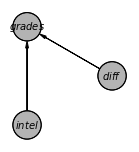

In [77]:
# daft 包画概率概率图模型

import daft
G=student.to_daft() 
G.render()  
# 如果要美化，需要修改对应的node，edge，和位置参数

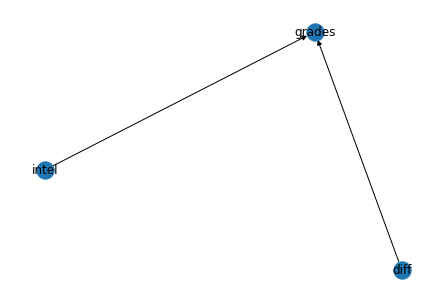

In [73]:
import networkx as nx
import pylab as plt 
nx_graph = nx.DiGraph(student.edges())
nx.draw(nx_graph,with_labels=True)
plt.show()
 

In [75]:
a=student.get_cpds()[2]
a.get_values()

array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.8, 0.8, 0.8, 0.8, 0.8, 0.8]])

In [76]:
print(student.get_cpds()[2])

+-----------+----------+----------+----------+----------+----------+----------+
| diff      | diff(0)  | diff(0)  | diff(0)  | diff(1)  | diff(1)  | diff(1)  |
+-----------+----------+----------+----------+----------+----------+----------+
| intel     | intel(0) | intel(1) | intel(2) | intel(0) | intel(1) | intel(2) |
+-----------+----------+----------+----------+----------+----------+----------+
| grades(0) | 0.1      | 0.1      | 0.1      | 0.1      | 0.1      | 0.1      |
+-----------+----------+----------+----------+----------+----------+----------+
| grades(1) | 0.1      | 0.1      | 0.1      | 0.1      | 0.1      | 0.1      |
+-----------+----------+----------+----------+----------+----------+----------+
| grades(2) | 0.8      | 0.8      | 0.8      | 0.8      | 0.8      | 0.8      |
+-----------+----------+----------+----------+----------+----------+----------+


####  观测数据估计因果效应--后门准则 
1.
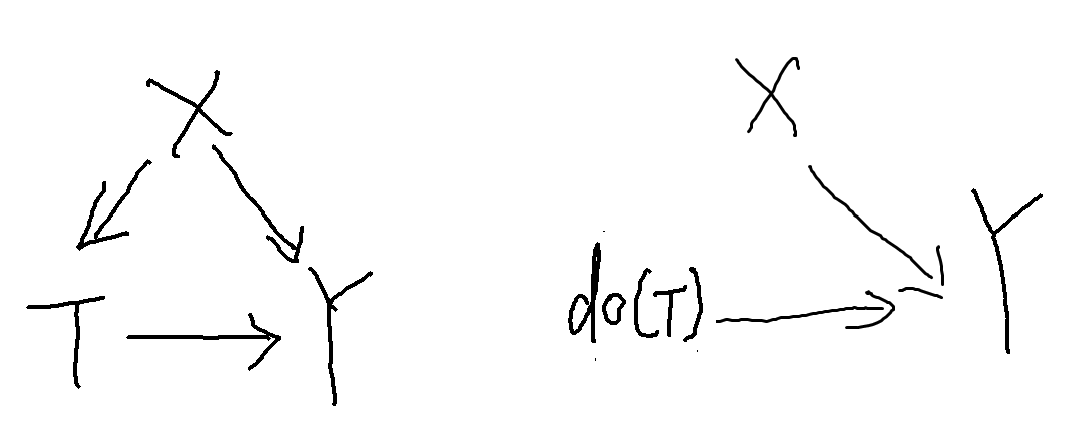
+  如果X是T到Y的后门集合，则有
+  $P(Y=1|do(T=A))=\sum_{x}P(Y=1|x,T=A)P(x)$
+ 因果效应
   $$\begin{array}{rl}&P(Y=1|do(T=B)-P(Y=1|do(T=A))\\&=\sum_{x}P(Y=1|x,T=B)P(x)-\sum_{x}P(Y=1|x,T=A)P(x)\end{array}$$
+ **{T的父亲集合是一个后面集合}**
 


#### 下面我们用pgmpy给个示例

参见：https://pgmpy.org/examples/Causal%20Inference.html

+ 导入包,

In [78]:
from pgmpy.models import BayesianNetwork
from pgmpy.inference import VariableElimination
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import CausalInference

+ 定义因果结构

<Axes:>

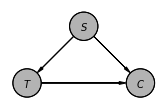

In [79]:
simp_model = BayesianNetwork([("S", "T"), ("T", "C"), ("S", "C")])
simp_model.to_daft(node_pos={"T": (0, 0), "C": (2, 0), "S": (1, 1)}).render()

+ 定义因果参数（条件概率表）

In [80]:
cpd_s = TabularCPD(
    variable="S", variable_card=2, values=[[0.5], [0.5]], state_names={"S": ["m", "f"]}
)
cpd_t = TabularCPD(
    variable="T",
    variable_card=2,
    values=[[0.25, 0.75], [0.75, 0.25]],
    evidence=["S"],
    evidence_card=[2],
    state_names={"S": ["m", "f"], "T": [0, 1]},
)
cpd_c = TabularCPD(
    variable="C",
    variable_card=2,
    values=[[0.3, 0.4, 0.7, 0.8], [0.7, 0.6, 0.3, 0.2]],
    evidence=["S", "T"],
    evidence_card=[2, 2],
    state_names={"S": ["m", "f"], "T": [0, 1], "C": [0, 1]},
)

simp_model.add_cpds(cpd_s, cpd_t, cpd_c)

+ 直接用条件概率计算P(C|T)

In [82]:
# Non adjusted inference
infer_non_adjust = VariableElimination(simp_model)
print(infer_non_adjust.query(variables=["C"], evidence={"T": 1}))
print(infer_non_adjust.query(variables=["C"], evidence={"T": 0}))

+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.5000 |
+------+----------+
| C(1) |   0.5000 |
+------+----------+
+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.6000 |
+------+----------+
| C(1) |   0.4000 |
+------+----------+


+ 使用因果推断，计算

$$P(C|do(T))$$

In [84]:
infer_adjusted = CausalInference(simp_model)
print(infer_adjusted.query(variables=["C"], do={"T": 1}))
print(infer_adjusted.query(variables=["C"], do={"T": 0}))

  0%|          | 0/2 [00:00<?, ?it/s]

+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.6000 |
+------+----------+
| C(1) |   0.4000 |
+------+----------+


  0%|          | 0/2 [00:00<?, ?it/s]

+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.5000 |
+------+----------+
| C(1) |   0.5000 |
+------+----------+


## 微软提供的 dowhy 包 

包容两种框架
 
Much like machine learning libraries have done for prediction, “DoWhy” is a Python library that aims to spark causal thinking and analysis. DoWhy provides a principled four-step interface for causal inference that focuses on explicitly modeling causal assumptions and validating them as much as possible.

In [1]:
import numpy as np

from dowhy import CausalModel
import dowhy.datasets 

In [12]:
data = dowhy.datasets.linear_dataset(beta=1,
        num_common_causes=1,   
        num_samples=5000, 
        treatment_is_binary=True,      
  )
df = data["df"]
df.head()

,W0,v0,y
0,-0.040184,True,0.993357
1,0.256490,False,0.109242
2,-0.036817,True,0.961710
3,0.469078,False,0.233143
4,-0.127530,True,0.950950


In [8]:
import numpy as np
import pandas as pd
import dowhy.api

N = 5000

z = np.random.uniform(size=N)
d = np.random.binomial(1., p=1./(1. + np.exp(-5. * z)))
y = 2. * z + d + 0.1 * np.random.normal(size=N)

df = pd.DataFrame({'Z': z, 'D': d, 'Y': y})
df.head()

,Z,D,Y
0,0.311299,1,1.659087
1,0.685338,0,1.345329
2,0.005241,0,-0.159679
3,0.044576,0,0.099811
4,0.458668,1,1.885368


### Basic Example for Graphical Causal Model-Based Intervention

In [13]:
import networkx as nx
causal_graph = nx.DiGraph([('X', 'Y'), ('Y', 'Z')])


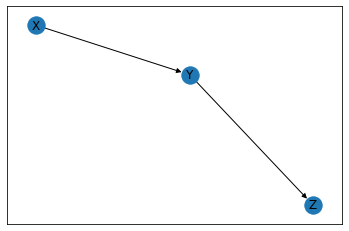

In [16]:
nx.draw_networkx(causal_graph)

In [21]:
from dowhy import gcm
causal_model = gcm.StructuralCausalModel(causal_graph)

In [22]:
import numpy as np, pandas as pd

X = np.random.normal(loc=0, scale=1, size=1000)
Y = 2 * X + np.random.normal(loc=0, scale=1, size=1000)
Z = 3 * Y + np.random.normal(loc=0, scale=1, size=1000)
data = pd.DataFrame(data=dict(X=X, Y=Y, Z=Z))
data.head()

,X,Y,Z
0,1.262538,2.932540,8.623044
1,-3.642139,-6.717685,-20.629961
2,-0.100642,0.224960,0.532947
3,0.709573,1.349369,0.710406
4,-0.518557,-0.246042,-0.718308


In [ ]:
gcm.auto.assign_causal_mechanisms(causal_model, data)

#### Fit Structural Causal Model (SCM)

In [24]:
# OR

causal_model.set_causal_mechanism('X', gcm.EmpiricalDistribution())
causal_model.set_causal_mechanism('Y', gcm.AdditiveNoiseModel(gcm.ml.create_linear_regressor()))
causal_model.set_causal_mechanism('Z', gcm.AdditiveNoiseModel(gcm.ml.create_linear_regressor()))

In [25]:

gcm.fit(causal_model, data)

Fitting causal mechanism of node Z: 100%|█████| 3/3 [00:00<00:00, 2975.39it/s]


####  Answering a causal query 


In [19]:
samples = gcm.interventional_samples(causal_model,
                                     {'Y': lambda y: 2.34 },
                                     num_samples_to_draw=1000)
samples.head()

,X,Y,Z
0,0.956833,2.34,9.214993
1,0.850276,2.34,7.120606
2,-2.250519,2.34,5.101390
3,-0.134932,2.34,8.284363
4,1.210232,2.34,6.579763
